In [1]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt

In [15]:
log = pd.read_csv('./logs/tello_state.log', header=None, sep='sep="\s+|;|:| |,|"')

/home/mrmopoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
log.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,2020-10-13,18,49,48,268,INFO,pitch,0,roll,0,...,147.19,time,0,agx,2.0,agy,-11.0,agz,-999.0,NaN
1,2020-10-13,18,49,48,369,INFO,pitch,0,roll,0,...,147.20,time,0,agx,0.0,agy,-10.0,agz,-999.0,NaN
2,2020-10-13,18,49,48,473,INFO,pitch,0,roll,0,...,147.20,time,0,agx,1.0,agy,-10.0,agz,-1000.0,NaN
3,2020-10-13,18,49,48,575,INFO,pitch,0,roll,0,...,147.20,time,0,agx,2.0,agy,-11.0,agz,-1001.0,NaN
4,2020-10-13,18,49,48,676,INFO,pitch,0,roll,0,...,147.12,time,0,agx,1.0,agy,-11.0,agz,-1000.0,NaN


In [16]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10643 entries, 0 to 10642
Data columns (total 39 columns):
0     10643 non-null object
1     10643 non-null int64
2     10643 non-null int64
3     10643 non-null int64
4     10643 non-null int64
5     10643 non-null object
6     10643 non-null object
7     10643 non-null int64
8     10643 non-null object
9     10643 non-null int64
10    10643 non-null object
11    10643 non-null int64
12    10643 non-null object
13    10643 non-null int64
14    10643 non-null object
15    10643 non-null int64
16    10643 non-null object
17    10643 non-null int64
18    10643 non-null object
19    10643 non-null int64
20    10643 non-null object
21    10643 non-null int64
22    10643 non-null object
23    10643 non-null int64
24    10643 non-null object
25    10643 non-null int64
26    10643 non-null object
27    10643 non-null int64
28    10643 non-null object
29    10643 non-null float64
30    10643 non-null object
31    10643 non-null int64
32    1064

In [18]:
columns_dict = { 0:'date',  1:'hours',  2:'minutes',  3:'seconds',  4:'ms',    7:'pitch',   9:'roll',  11:'yaw',  13:'vgx',  15:'vgy', 
            17:'vgz', 19:'templ', 21:'temph',  23:'tof',  25:'h',  27:'bat',  29:'baro',  31:'time',  33:'agx',   35:'agy',  37:'agz'}

log.rename(columns=columns_dict, inplace=True)
log['time_stamp'] = log.apply(lambda row: timedelta( hours=row['hours'], minutes=row['minutes'], seconds=row['seconds'], milliseconds=row['ms']), axis=1)
log['date'] = pd.to_datetime(log['date'])
log['time_stamp'] = log['date'] + log['time_stamp']
data_cols = [col for col in log.columns if log[col].dtype != 'object']
log = log[data_cols].drop(columns=[38])

In [22]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10643 entries, 0 to 10642
Data columns (total 22 columns):
date          10643 non-null datetime64[ns]
hours         10643 non-null int64
minutes       10643 non-null int64
seconds       10643 non-null int64
ms            10643 non-null int64
pitch         10643 non-null int64
roll          10643 non-null int64
yaw           10643 non-null int64
vgx           10643 non-null int64
vgy           10643 non-null int64
vgz           10643 non-null int64
templ         10643 non-null int64
temph         10643 non-null int64
tof           10643 non-null int64
h             10643 non-null int64
bat           10643 non-null int64
baro          10643 non-null float64
time          10643 non-null int64
agx           10643 non-null float64
agy           10643 non-null float64
agz           10643 non-null float64
time_stamp    10643 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(16)
memory usage: 1.8 MB


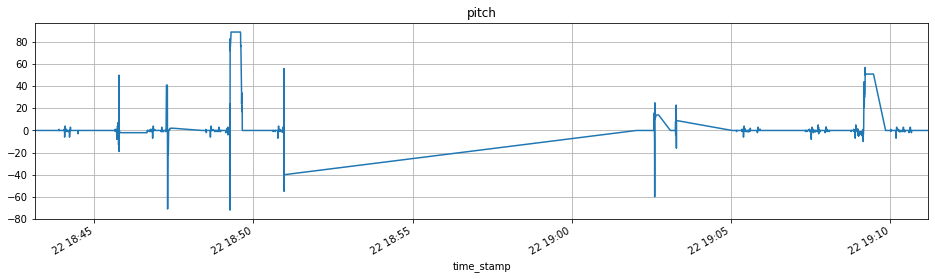

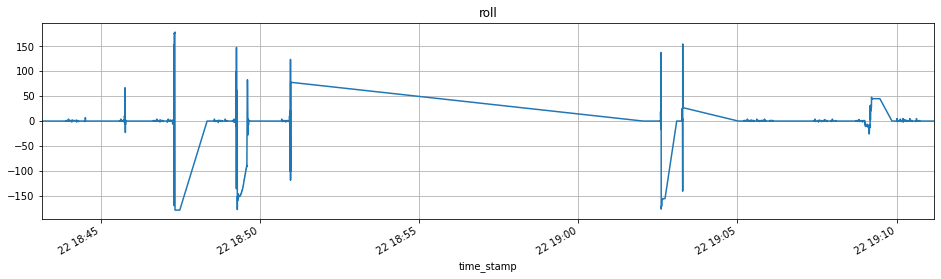

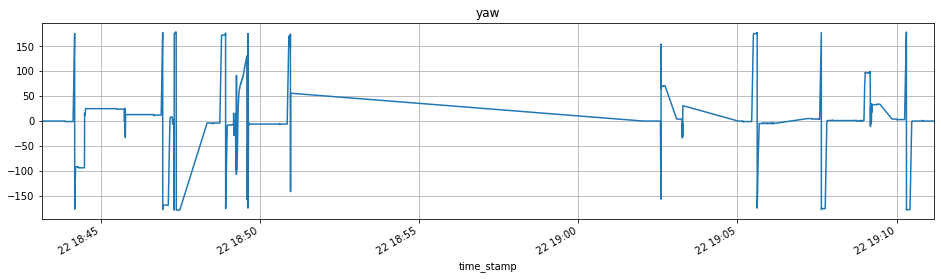

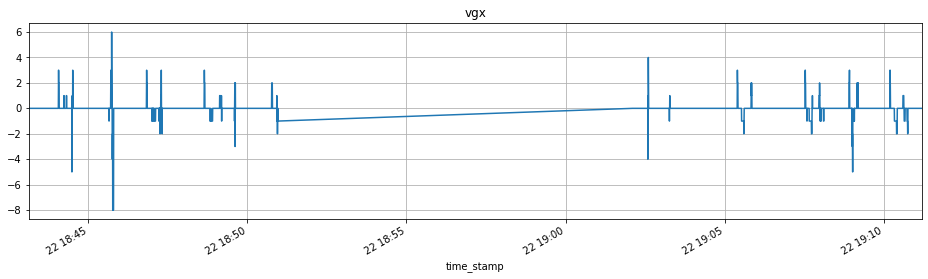

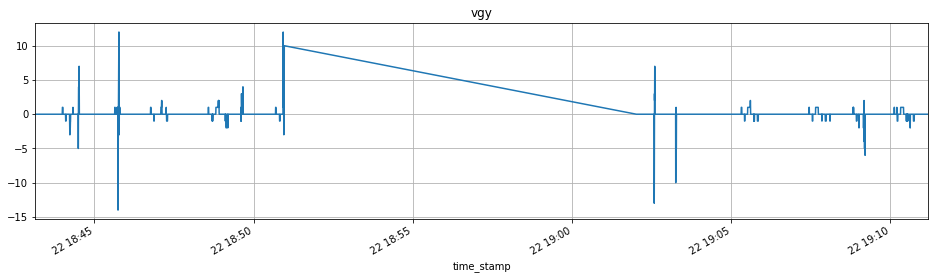

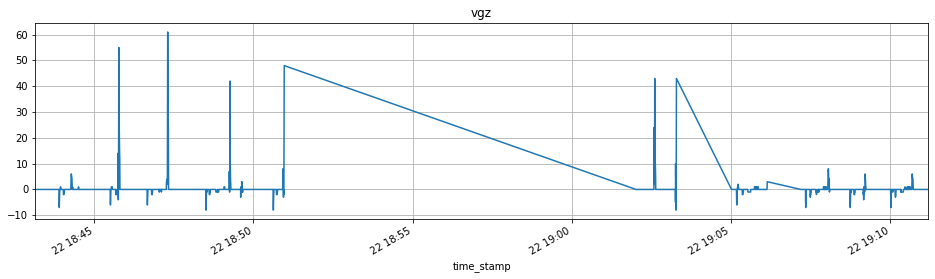

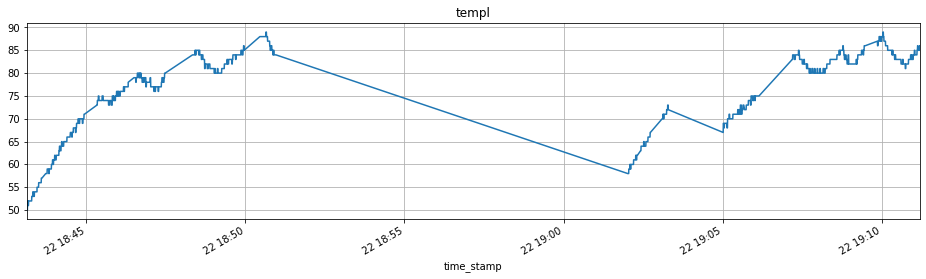

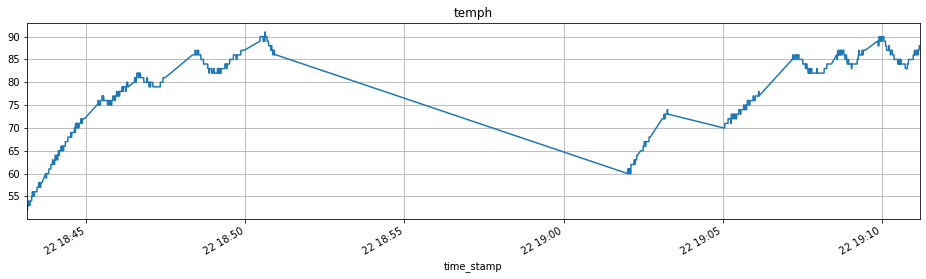

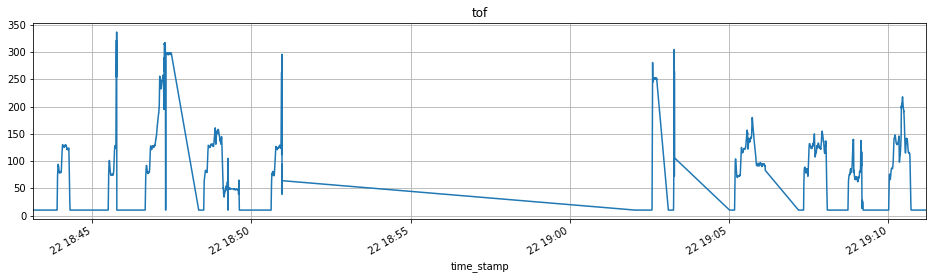

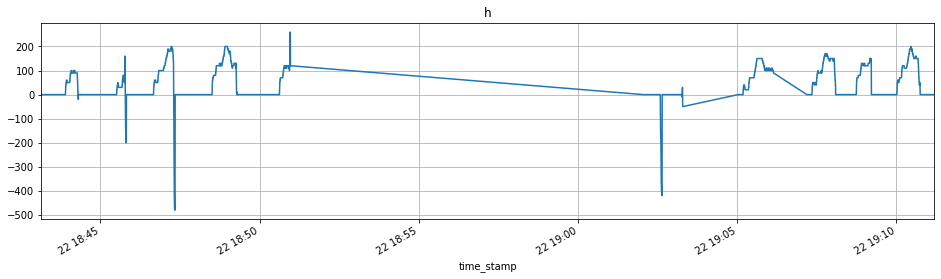

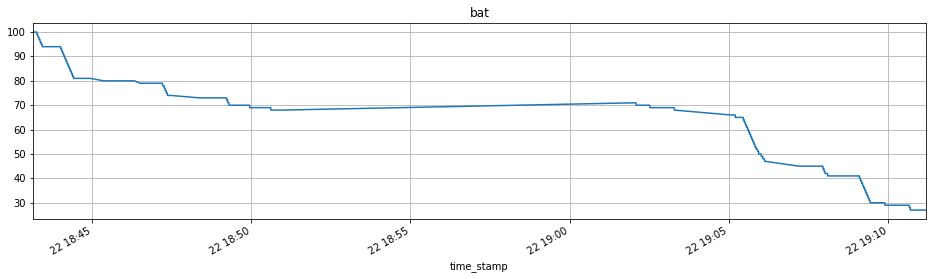

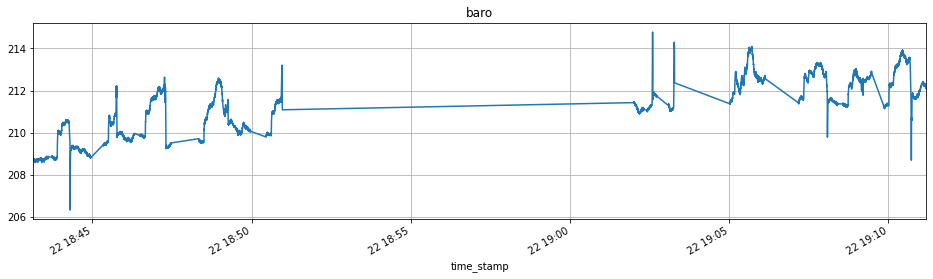

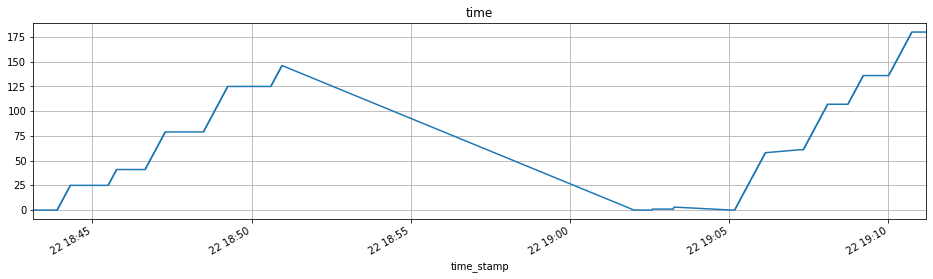

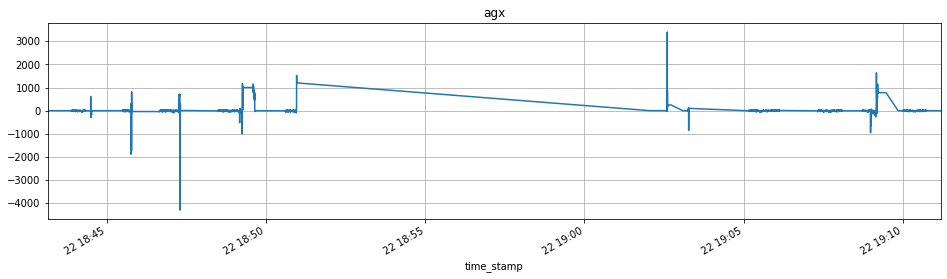

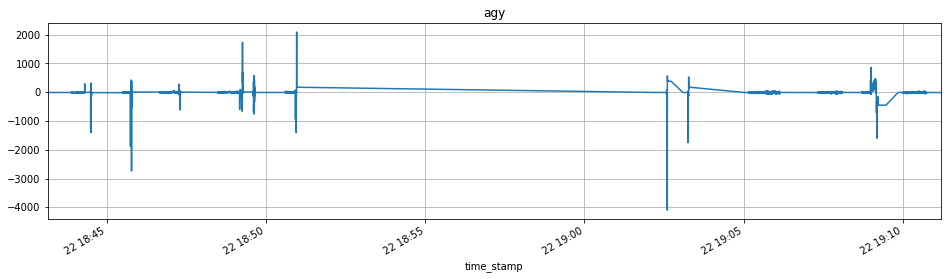

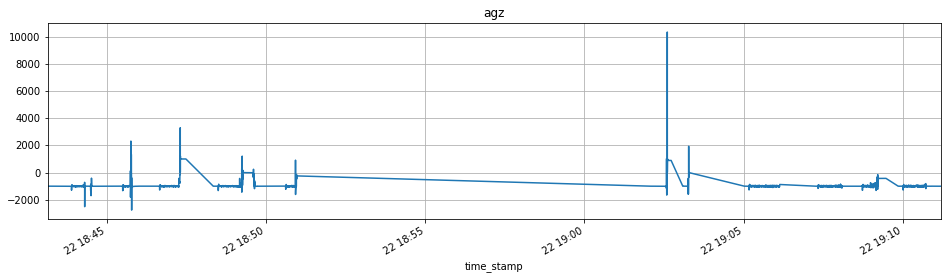

In [23]:
for col in ['pitch', 'roll', 'yaw',
       'vgx', 'vgy', 'vgz', 'templ', 'temph', 'tof', 'h', 'bat', 'baro',
       'time', 'agx', 'agy', 'agz']:
    log.set_index('time_stamp').loc['2020-10-22':][col].plot(title=col, figsize=(16,4))
    plt.grid()
    plt.show()
       

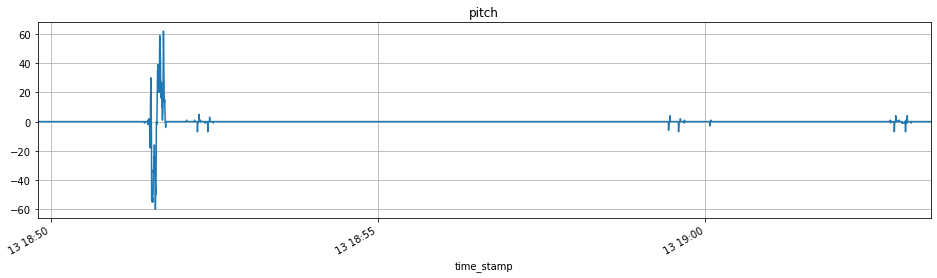

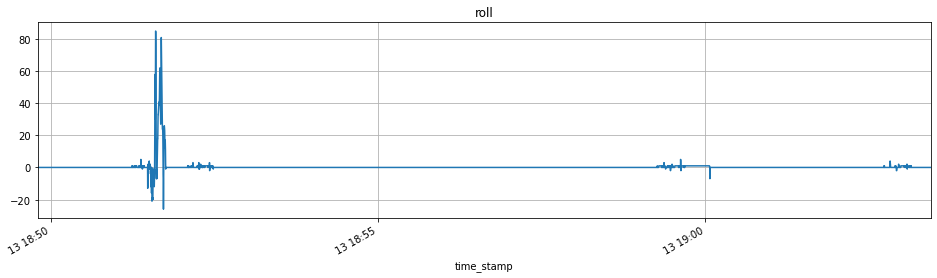

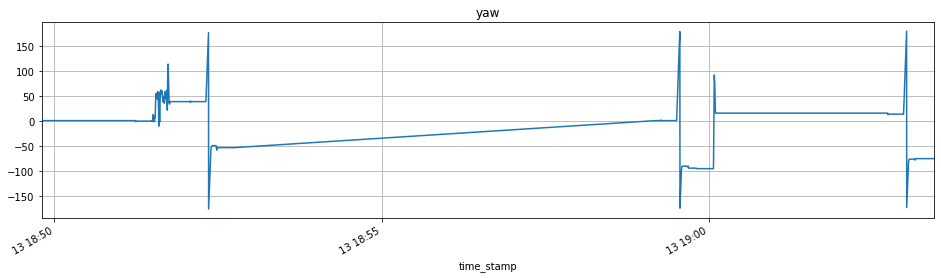

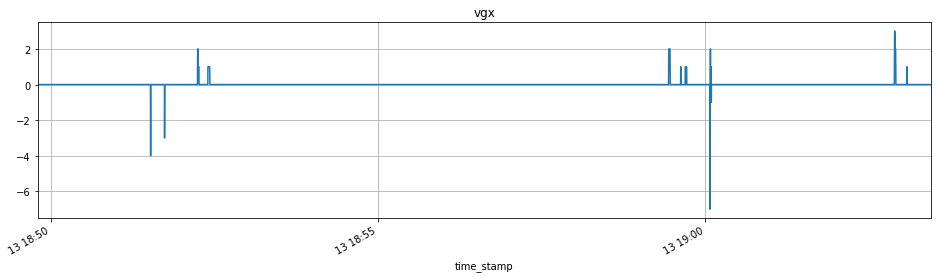

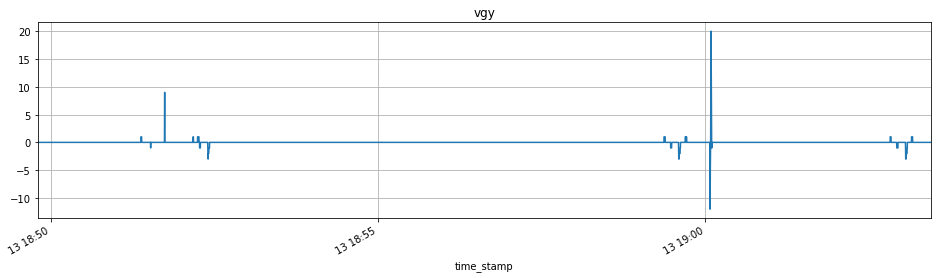

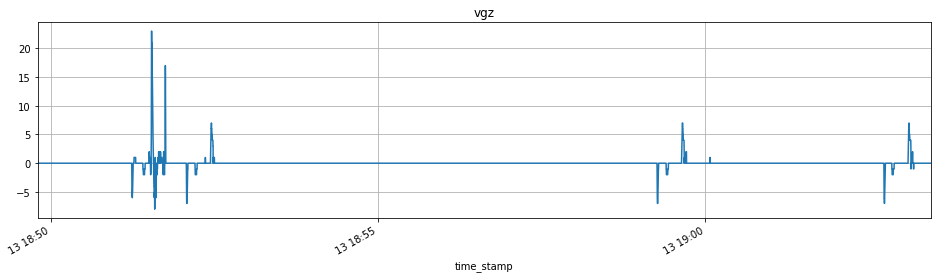

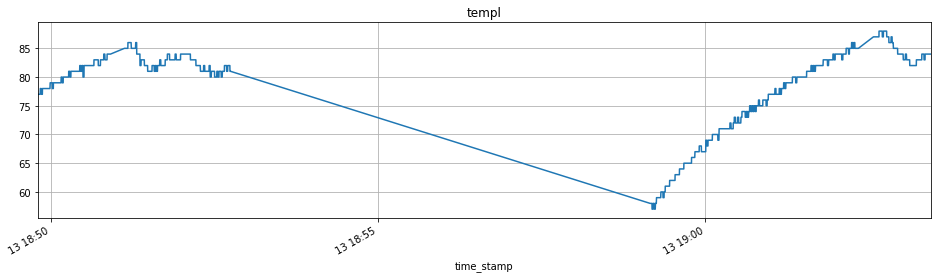

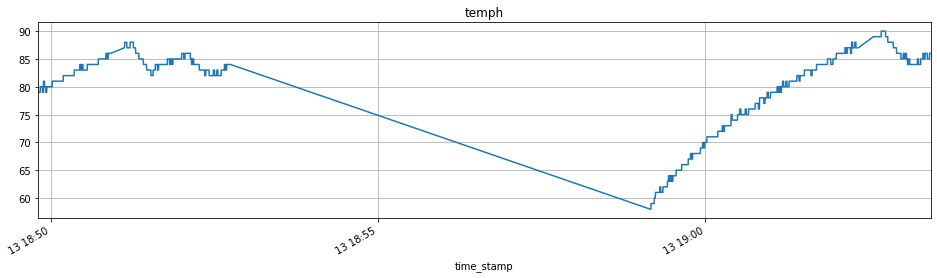

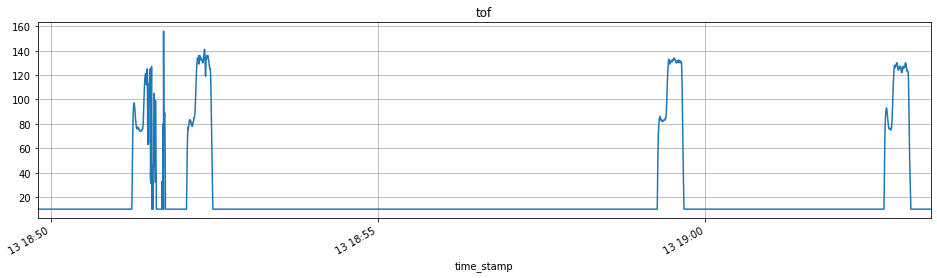

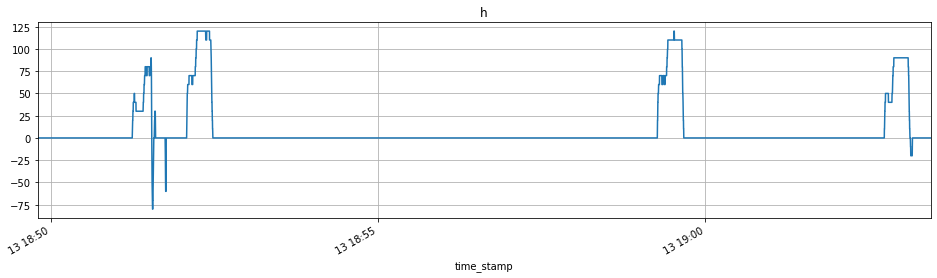

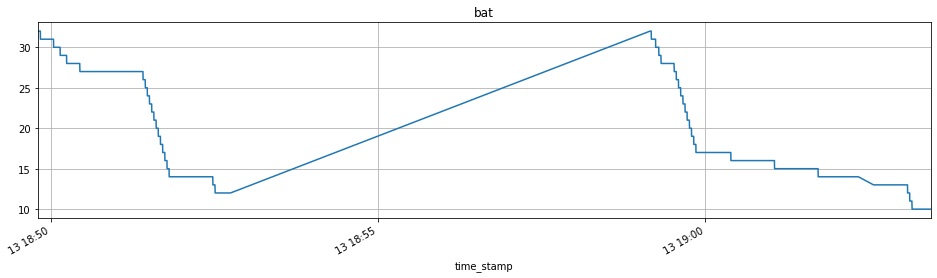

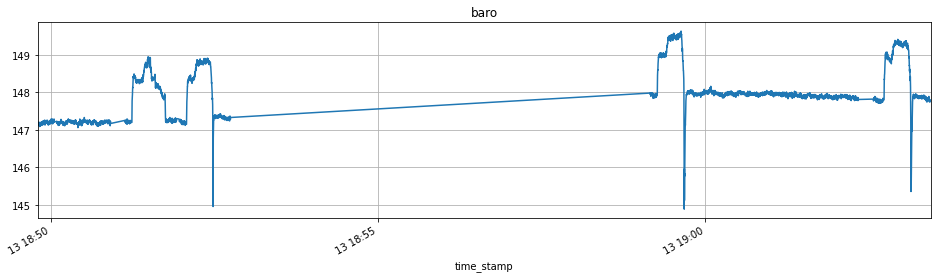

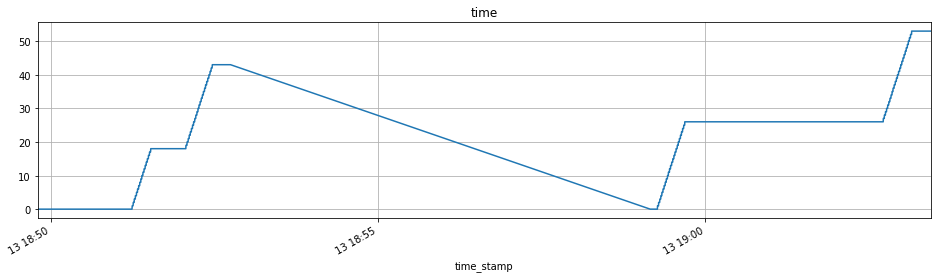

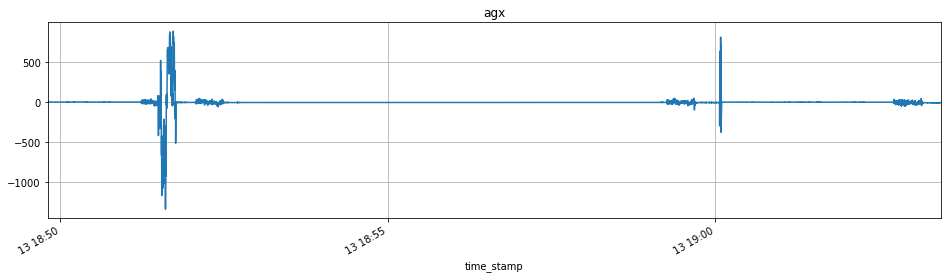

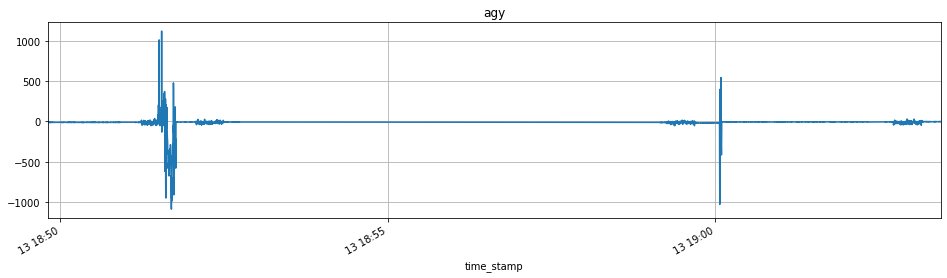

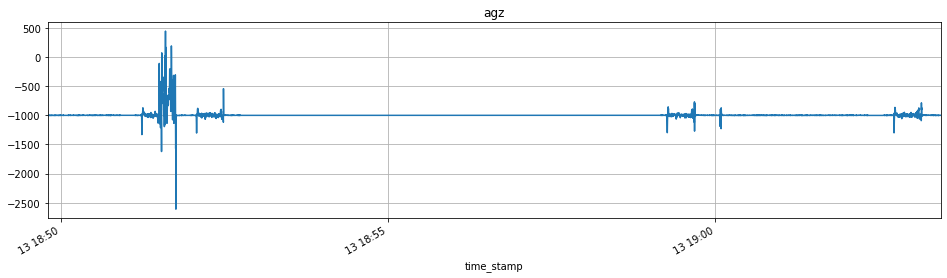

In [13]:
for col in ['pitch', 'roll', 'yaw',
       'vgx', 'vgy', 'vgz', 'templ', 'temph', 'tof', 'h', 'bat', 'baro',
       'time', 'agx', 'agy', 'agz']:
    log.set_index('time_stamp')[col].plot(title=col, figsize=(16,4))
    plt.grid()
    plt.show()
       